<a href="https://colab.research.google.com/github/thanchanok-a/thanchanok-a/blob/main/E_Commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

###**Importing Amazon Dataset from Kaggle**

---



In [ ]:
!pip install kaggle
!pip install kagglehub
!pip install pandas


In [ ]:
import kagglehub
import os
import pandas as pd
from google.colab import data_table
import pandas as p



In [ ]:
path = kagglehub.dataset_download("swathiunnikrishnan/amazon-consumer-behaviour-dataset")
print("Path :", path)

100%|██████████| 15.5k/15.5k [00:00<00:00, 19.5MB/s]

Extracting files...
Path : /root/.cache/kagglehub/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset/versions/1


In [ ]:
files = os.listdir(path)
print("Files :", files)

Files : ['Amazon Customer Behavior Survey.csv']


In [ ]:
csvFile = [f for f in files if f.endswith('csv')][0]
csvPath = os.path.join(path, csvFile)
print("CSV File Path :", csvPath)

CSV File Path : /root/.cache/kagglehub/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset/versions/1/Amazon Customer Behavior Survey.csv


In [ ]:
df = pd.read_csv(csvPath)
data_table.DataTable(df, max_columns=30)


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy




---

### **Data** Processing


---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [ ]:
df.isna().sum()

,0
Timestamp,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,2
Search_Result_Exploration,0
Customer_Reviews_Importance,0


only **Product_search_method** has Null values

In [ ]:
# Numerical columns
numerical = df.select_dtypes(include=['int64'])

# Categorical columns
categorical = df.select_dtypes(include=['object'])

In [ ]:
numerical

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
0,23,1,2,1,1
1,23,1,2,3,2
2,24,2,4,3,3
3,24,5,3,3,4
4,22,1,4,2,2
...,...,...,...,...,...
597,23,4,3,3,4
598,23,3,3,3,3
599,23,3,3,2,3
600,23,1,2,2,2


In [ ]:
numerical.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000




*   **Age**

Here we can see that the mean age is around 31 years with the deviation of 10 years and interquartile range (IQR) lie between 23 and 36 years. The data also show it has some possible outliers.
*   **Other**

The remaining numerical features have means around the middle of their respective scales, indicating a central tendency towards moderate value



### EDA (Exploratory Data Analysis)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

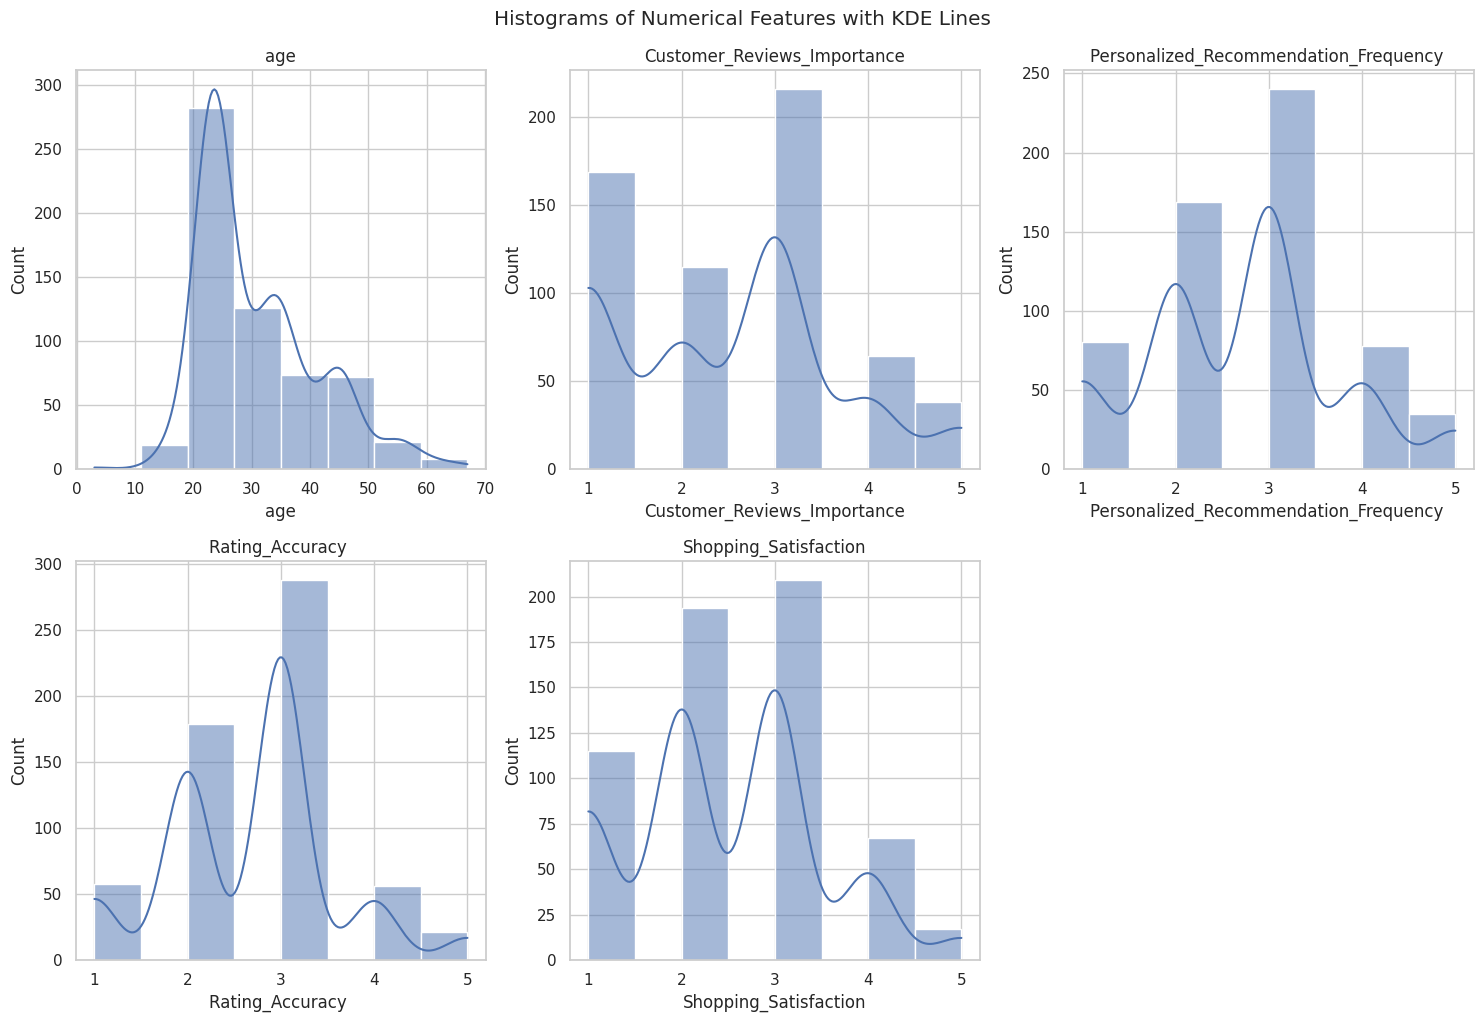

In [ ]:
# Histograms with KDE lines
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(numerical[column], kde=True, bins=8)
    plt.title(f'{column}')
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features with KDE Lines', y=1.02)
plt.show()

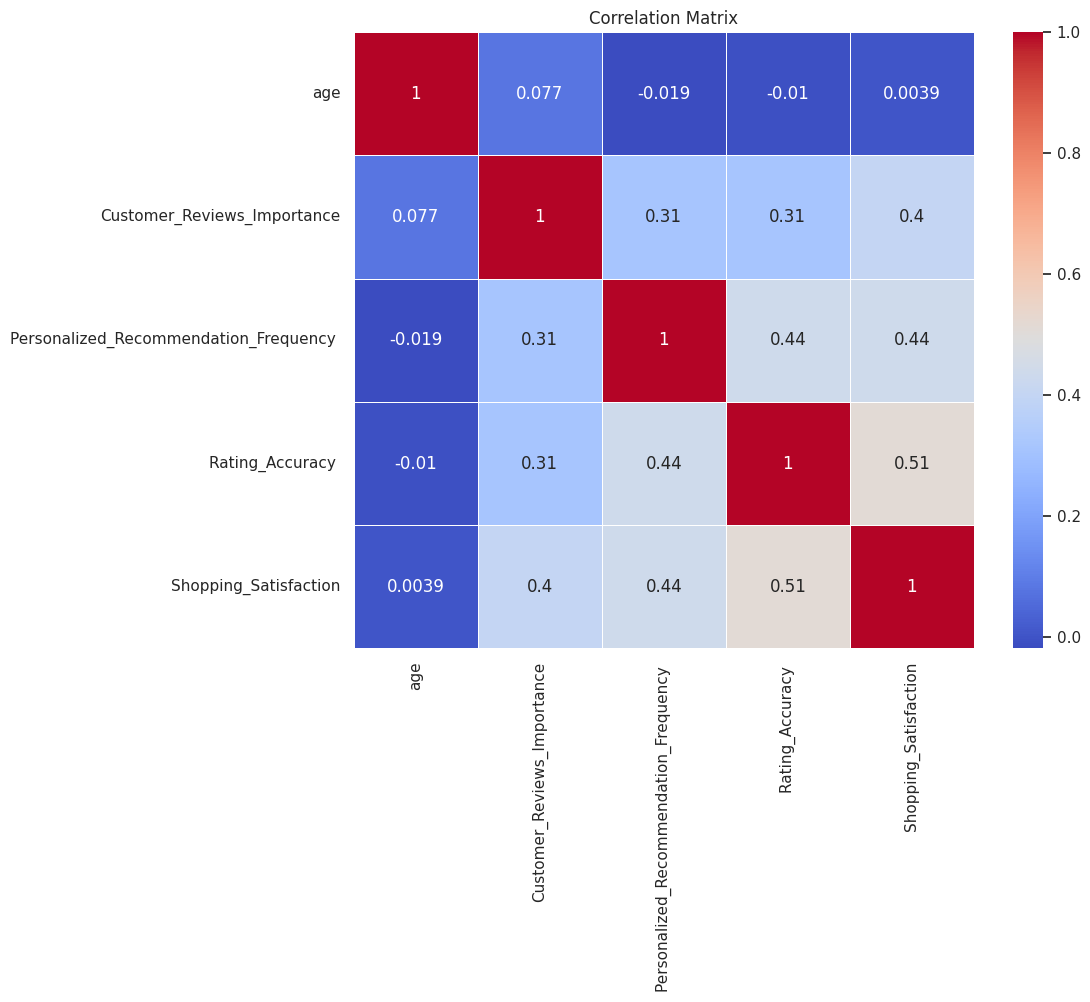

In [ ]:
# Correlation Matrix
correlation_matrix = numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
categorical

,Timestamp,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Recommendation_Helpfulness,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,Yes,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,Sometimes,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,No,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,Sometimes,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,Yes,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Moderately,Sometimes,Sometimes,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Sometimes,Sometimes,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,Maybe,Sometimes,High shipping costs,Sometimes,Yes,Occasionally,Sometimes,Sometimes,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,Yes,Often,others,Sometimes,No,Heavily,Yes,Yes,Wide product selection,Product quality and accuracy


In [ ]:
for column in categorical.columns:
    print(column)

Timestamp
Gender
Purchase_Frequency
Purchase_Categories
Personalized_Recommendation_Frequency
Browsing_Frequency
Product_Search_Method
Search_Result_Exploration
Add_to_Cart_Browsing
Cart_Completion_Frequency
Cart_Abandonment_Factors
Saveforlater_Frequency
Review_Left
Review_Reliability
Review_Helpfulness
Recommendation_Helpfulness
Service_Appreciation
Improvement_Areas


<ipython-input-17-890089a445af>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  categorical['Timestamp'] = pd.to_datetime(categorical['Timestamp'])


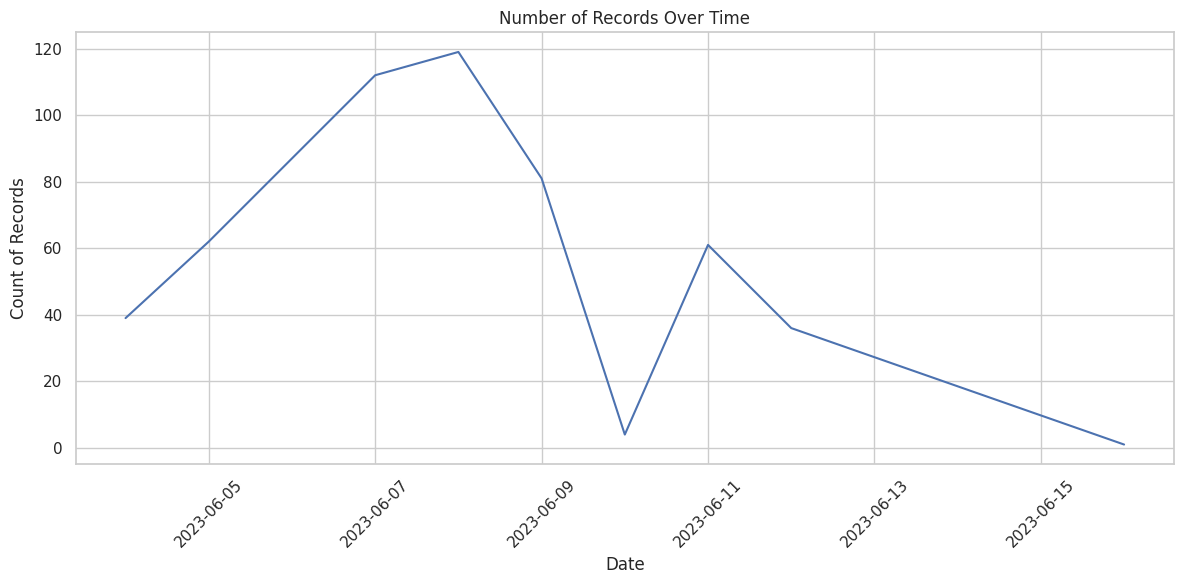

In [ ]:
#Convert Timestamp to datetime
categorical['Timestamp'] = pd.to_datetime(categorical['Timestamp'])
time_series_data = categorical['Timestamp'].dt.date.value_counts().sort_index()

sns.set(style="whitegrid")

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=time_series_data.index, y=time_series_data.values)
plt.title('Number of Records Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print("Starts: ", categorical['Timestamp'].min())
print("Ends: ", categorical['Timestamp'].max())

Starts:  2023-06-04 13:28:19-05:30
Ends:  2023-06-16 09:16:05-05:30


In [ ]:
# Drop Timestamp
categorical = categorical.drop(columns=['Timestamp'])

In [ ]:
def visualize_categorical(series, title=None):
    """
    Visualize the distribution of a categorical feature.

    Params:
    - series (pd.Series): The categorical data to visualize.
    - title (str): Title for the plot. If None, defaults to 'Count of {series.name}'.
    """
    # Value counts
    print(series.value_counts())

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Count Plot
    plt.figure(figsize=(10, 8))
    sns.countplot(y=series, order=series.value_counts().index)
    plt.title(title if title else f'Count of {series.name}')
    plt.xlabel('Count')
    plt.ylabel(series.name)
    plt.show()

Gender
Female               352
Male                 142
Prefer not to say     89
Others                19
Name: count, dtype: int64


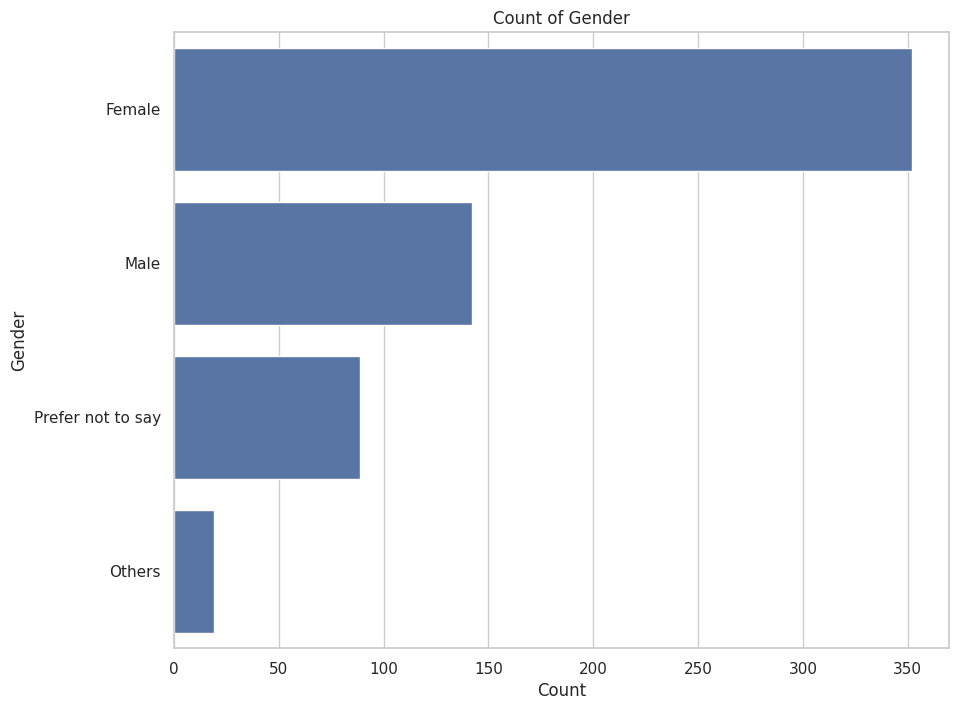

In [ ]:
visualize_categorical(categorical['Gender'])

Purchase_Frequency
Few times a month         203
Less than once a month    124
Once a week               112
Once a month              107
Multiple times a week      56
Name: count, dtype: int64


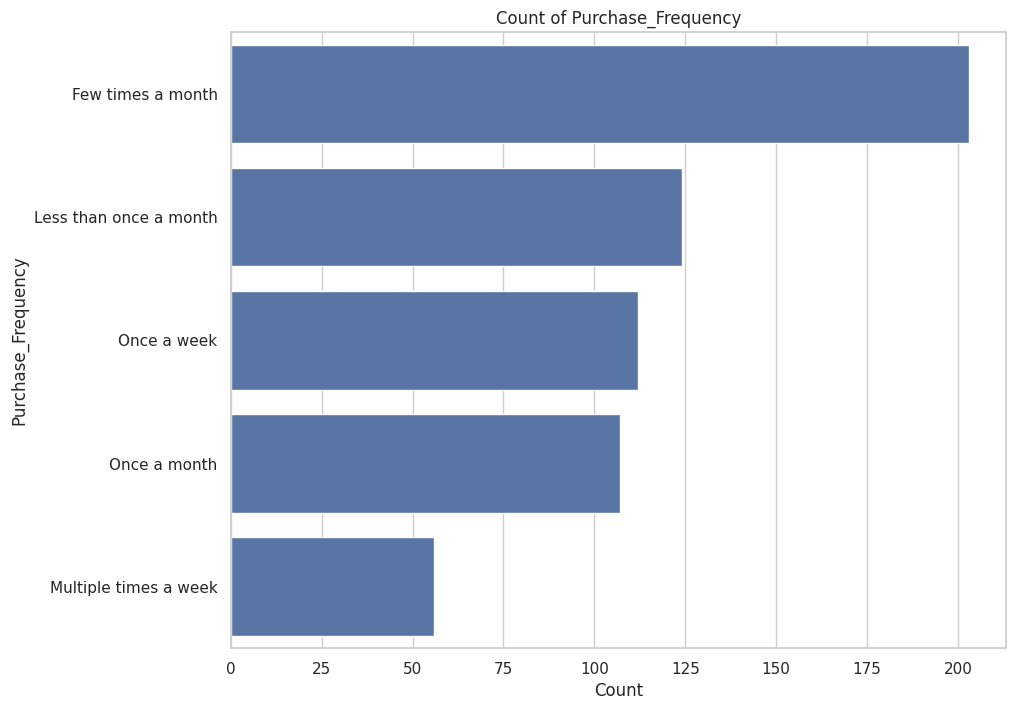

In [ ]:
visualize_categorical(categorical['Purchase_Frequency'])

Purchase_Categories
Beauty and Personal Care                                                                            106
Clothing and Fashion                                                                                106
others                                                                                               48
Beauty and Personal Care;Clothing and Fashion                                                        46
Beauty and Personal Care;Clothing and Fashion;Home and Kitchen                                       42
Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others     32
Clothing and Fashion;Home and Kitchen                                                                27
Home and Kitchen                                                                                     24
Beauty and Personal Care;Home and Kitchen                                                            21
Clothing and Fashion;Home and Kitchen;others

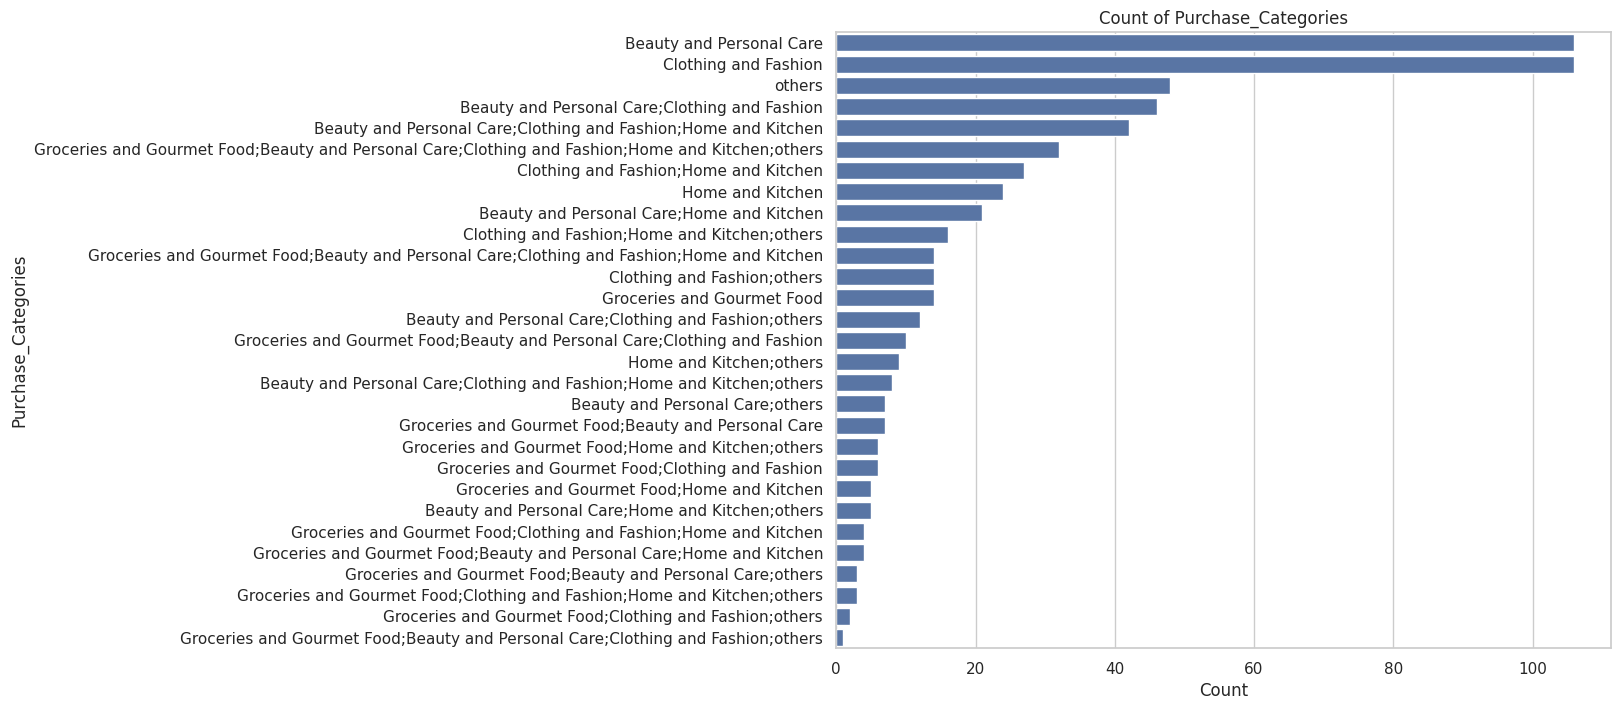

In [ ]:
visualize_categorical(categorical['Purchase_Categories'])

Personalized_Recommendation_Frequency
No           251
Sometimes    229
Yes          122
Name: count, dtype: int64


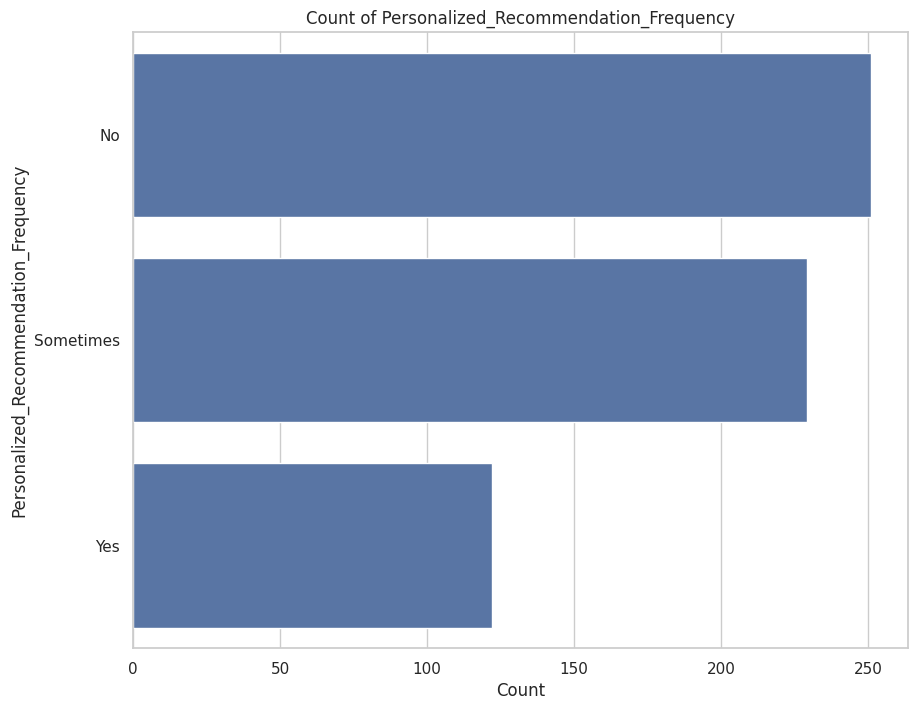

In [ ]:
visualize_categorical(categorical['Personalized_Recommendation_Frequency'])

Browsing_Frequency
Few times a week        249
Few times a month       199
Rarely                   77
Multiple times a day     77
Name: count, dtype: int64


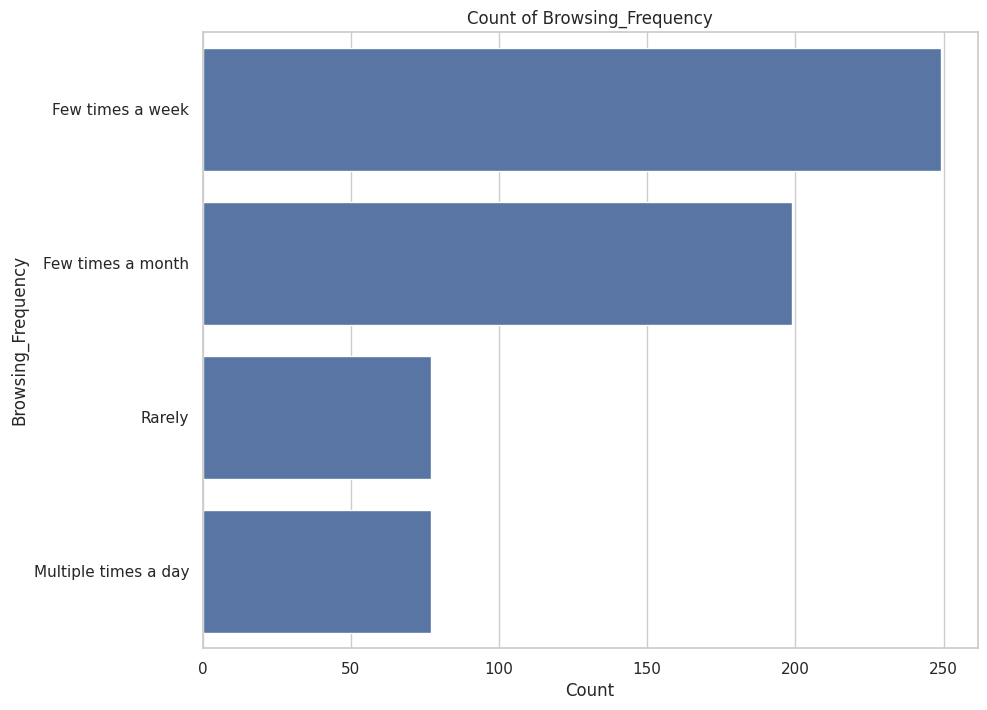

In [ ]:
visualize_categorical(categorical['Browsing_Frequency'])

Product_Search_Method
categories    223
Keyword       214
Filter        127
others         36
Name: count, dtype: int64


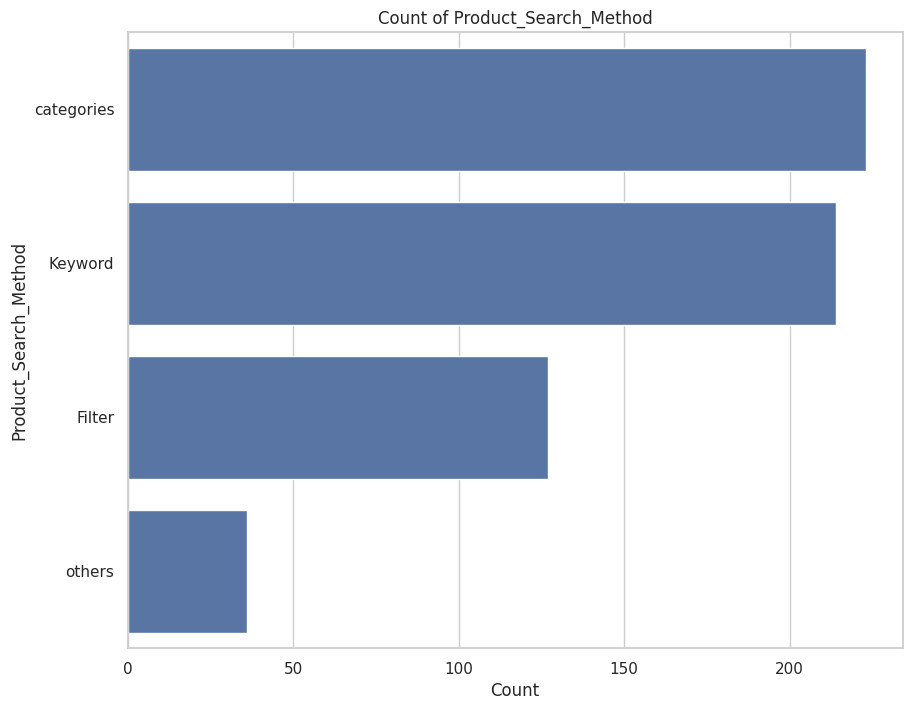

In [ ]:
visualize_categorical(categorical['Product_Search_Method'])

Search_Result_Exploration
Multiple pages    442
First page        160
Name: count, dtype: int64


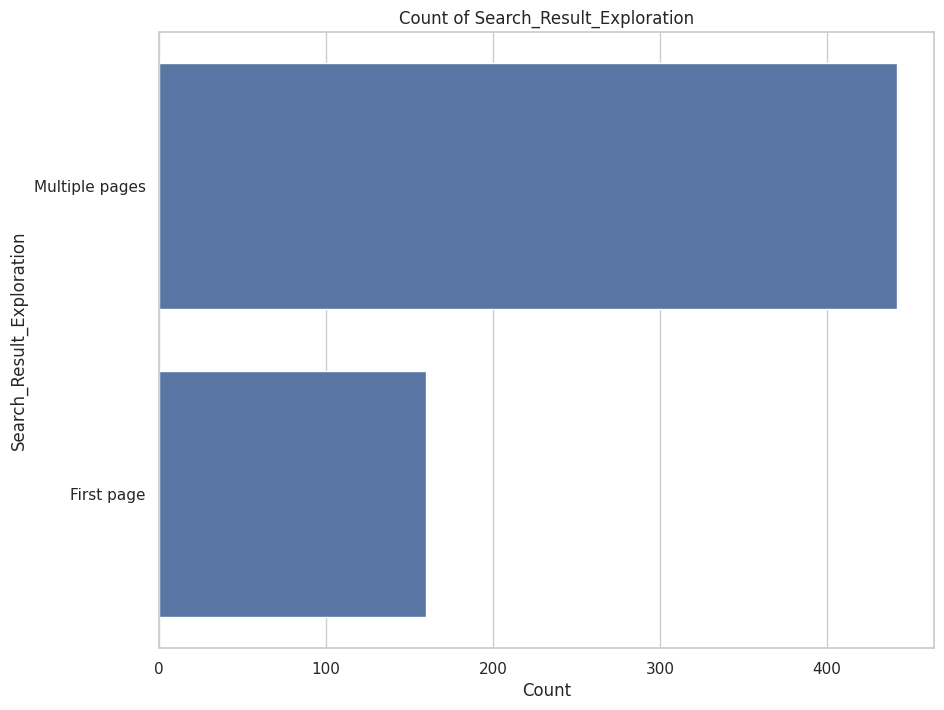

In [ ]:
visualize_categorical(categorical['Search_Result_Exploration'])

Add_to_Cart_Browsing
Maybe    248
Yes      216
No       138
Name: count, dtype: int64


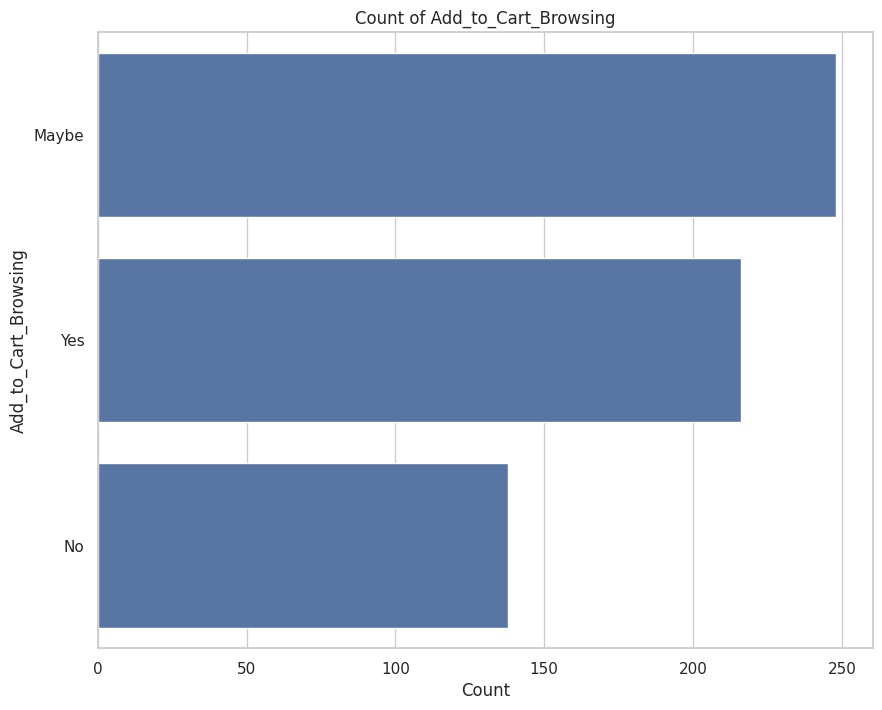

In [ ]:
visualize_categorical(categorical['Add_to_Cart_Browsing'])

Cart_Completion_Frequency
Sometimes    304
Often        158
Rarely        72
Always        47
Never         21
Name: count, dtype: int64


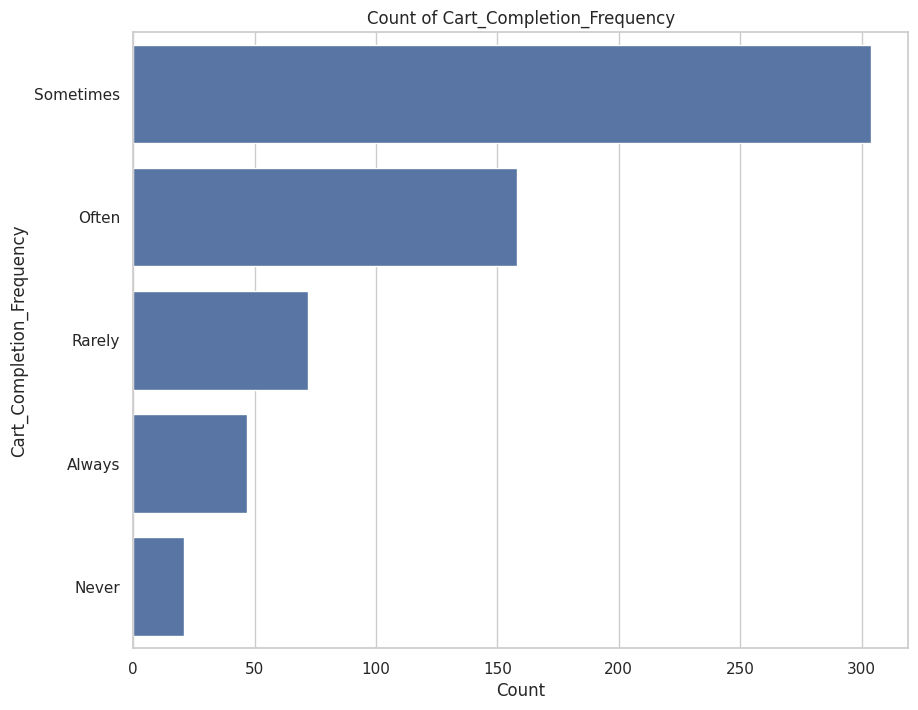

In [ ]:
visualize_categorical(categorical['Cart_Completion_Frequency'])

Cart_Abandonment_Factors
Found a better price elsewhere                255
Changed my mind or no longer need the item    241
High shipping costs                            70
others                                         36
Name: count, dtype: int64


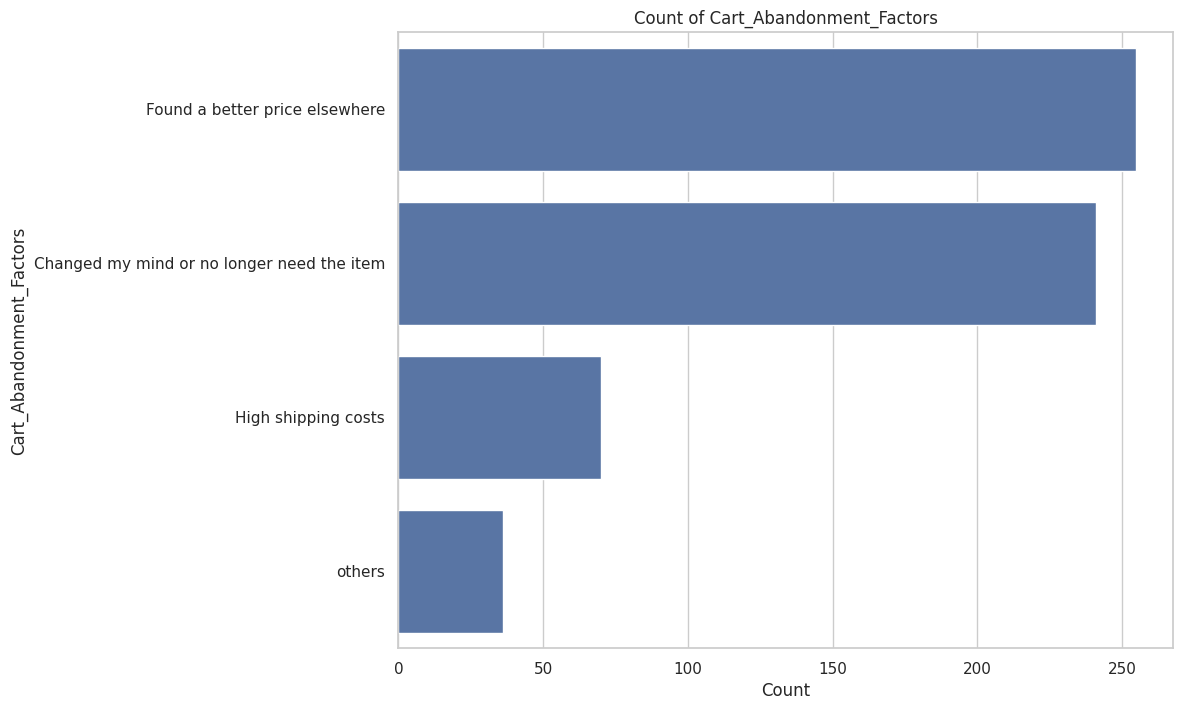

In [ ]:
visualize_categorical(categorical['Cart_Abandonment_Factors'])

Saveforlater_Frequency
Sometimes    251
Often        156
Rarely        82
Never         59
Always        54
Name: count, dtype: int64


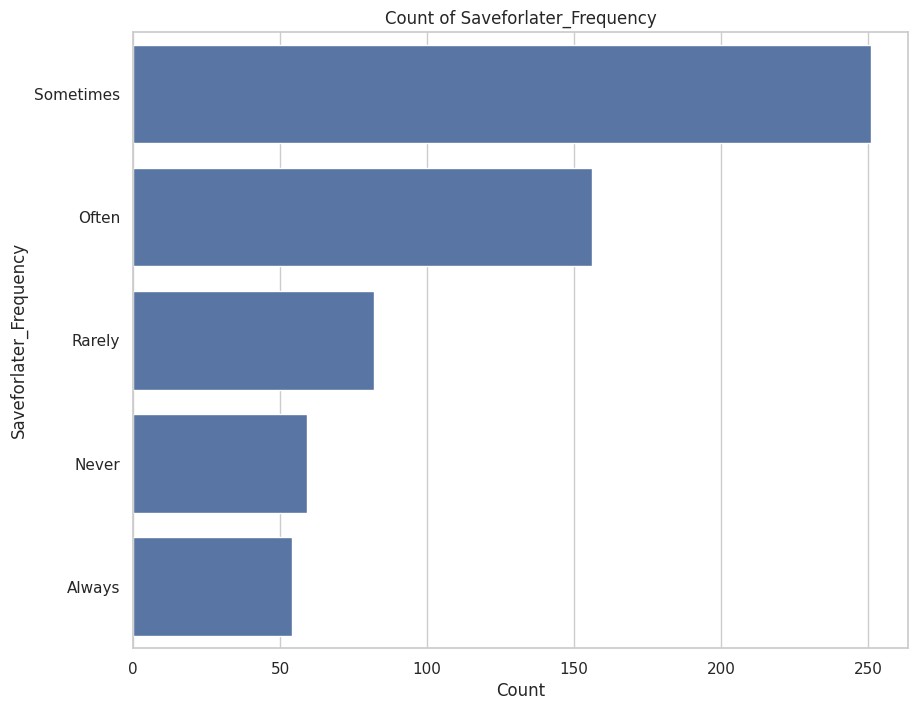

In [ ]:
visualize_categorical(categorical['Saveforlater_Frequency'])

Review_Left
Yes    310
No     292
Name: count, dtype: int64


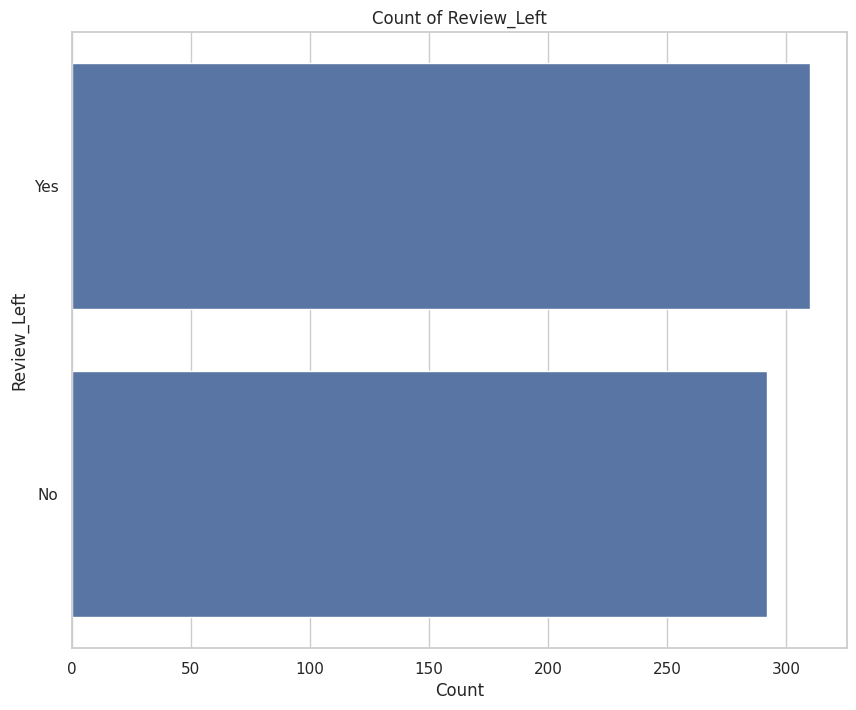

In [ ]:
visualize_categorical(categorical['Review_Left'])

Review_Reliability
Moderately      199
Occasionally    190
Heavily         149
Rarely           41
Never            23
Name: count, dtype: int64


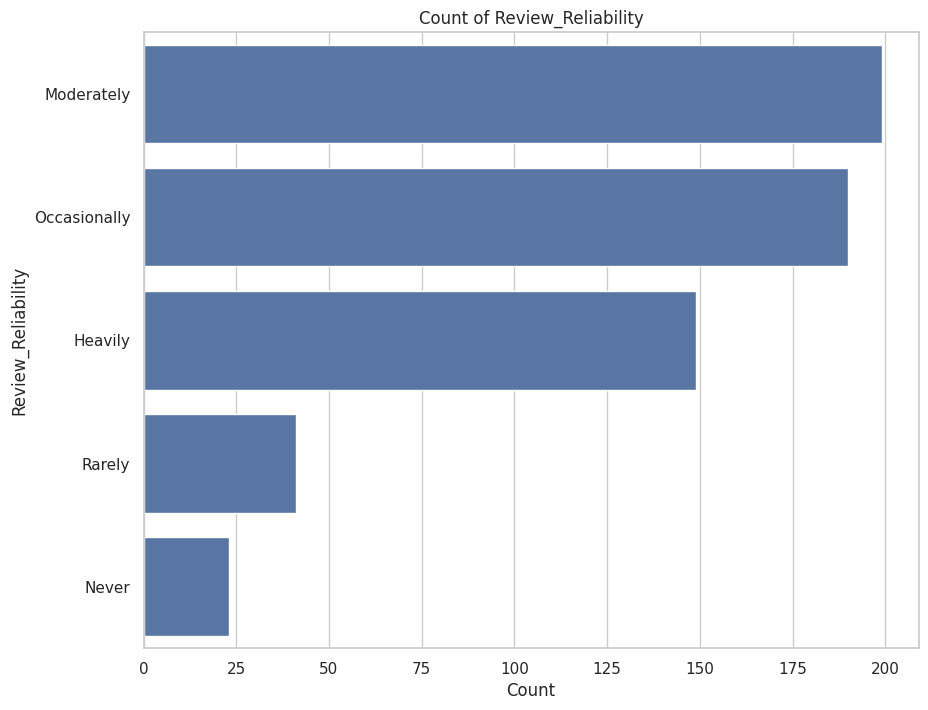

In [ ]:
visualize_categorical(categorical['Review_Reliability'])

Review_Helpfulness
Yes          237
Sometimes    227
No           138
Name: count, dtype: int64


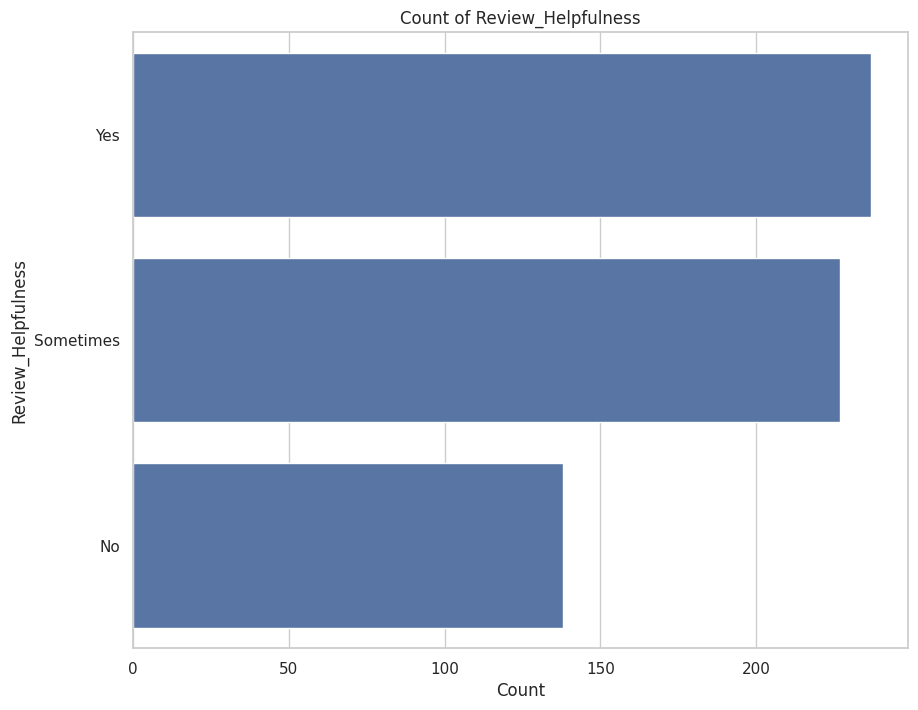

In [ ]:
visualize_categorical(categorical['Review_Helpfulness'])

Recommendation_Helpfulness
Sometimes    273
No           172
Yes          157
Name: count, dtype: int64


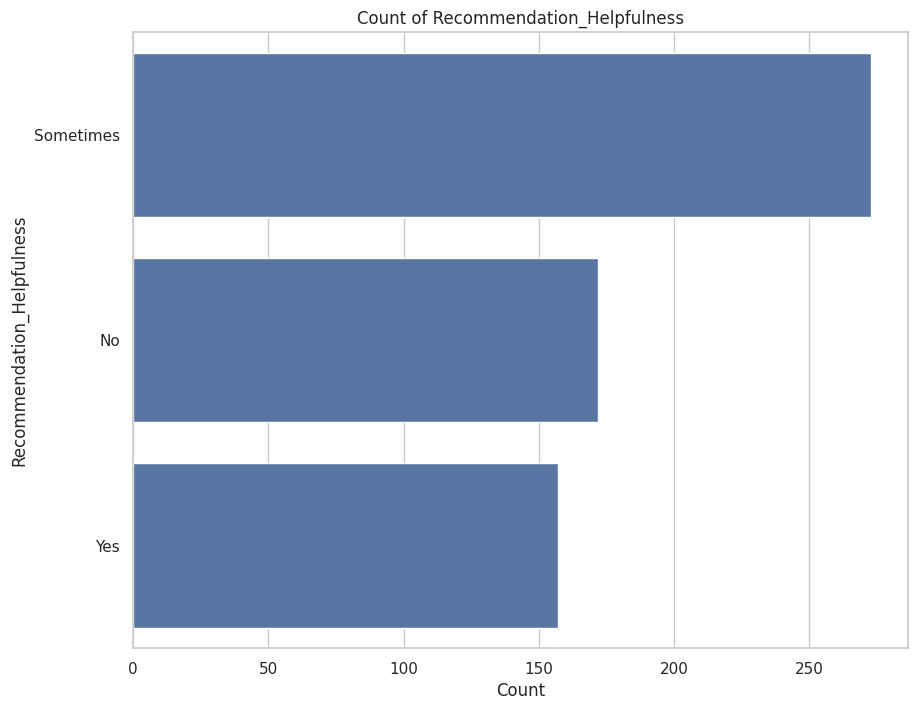

In [ ]:
visualize_categorical(categorical['Recommendation_Helpfulness'])

Service_Appreciation
Product recommendations                185
Competitive prices                     182
Wide product selection                 150
User-friendly website/app interface     80
.                                        1
Customer service                         1
Customer service                         1
Quick delivery                           1
All the above                            1
Name: count, dtype: int64


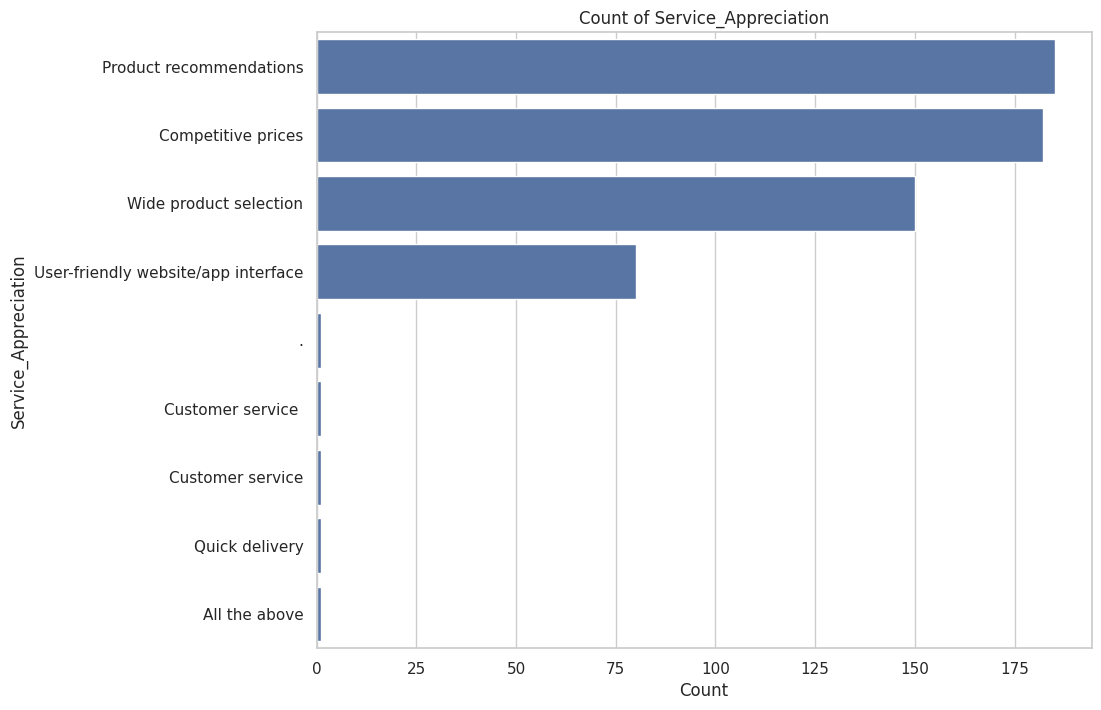

In [ ]:
visualize_categorical(categorical['Service_Appreciation'])



---

# **Sentiment Analysis**

---



In [ ]:
# Display unique values in 'Service_Appreciation' and 'Improvement_Areas' columns
improvement_areas_unique = df['Improvement_Areas'].unique()
service_appreciation_unique = df['Service_Appreciation'].unique() # Assign unique values to service_appreciation_unique
service_appreciation_unique, improvement_areas_unique

(array(['Competitive prices', 'Wide product selection',
        'User-friendly website/app interface', '.', 'Customer service ',
        'Product recommendations', 'Customer service', 'Quick delivery',
        'All the above'], dtype=object),
 array(['Reducing packaging waste', 'Product quality and accuracy',
        'Shipping speed and reliability',
        'Customer service responsiveness', '.', 'Nothing',
        'better app interface and lower shipping charges', 'Nil',
        'Add more familiar brands to the list', 'UI',
        'Scrolling option would be much better than going to next page',
        'Quality of product is very poor according to the big offers',
        'I have no problem with Amazon yet. But others tell me about the refund issues ',
        'User interface ', 'Irrelevant product suggestions',
        'User interface of app', "I don't have any problem with Amazon",
        'No problems with Amazon'], dtype=object))

In [ ]:
# Install vaderSentiment library
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    """
    Classify the sentiment of a text using VADER.
    """
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Filter out predefined options and missing values
open_text_responses = df['Improvement_Areas'][~df['Improvement_Areas'].isin(['.', 'Reducing packaging waste', 'Product quality and accuracy', 'Shipping speed and reliability', 'Customer service responsiveness', 'Nothing', 'Nil'])]

# Apply sentiment analysis
sentiments = open_text_responses.apply(classify_sentiment)
sentiments.value_counts()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


,count
Improvement_Areas,
neutral,5
positive,4
negative,2


K-Means Method for numerical data

In [ ]:
features_for_clustering = numerical.drop(columns=['age'])

In [ ]:
print(features_for_clustering.head())

   Customer_Reviews_Importance  Personalized_Recommendation_Frequency   \
0                            1                                       2   
1                            1                                       2   
2                            2                                       4   
3                            5                                       3   
4                            1                                       4   

   Rating_Accuracy   Shopping_Satisfaction  
0                 1                      1  
1                 3                      2  
2                 3                      3  
3                 3                      4  
4                 2                      2  


In [ ]:
# Encode categorical variables numerically
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in features_for_clustering.columns:
   features_for_clustering[col] = le.fit_transform(features_for_clustering[col])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

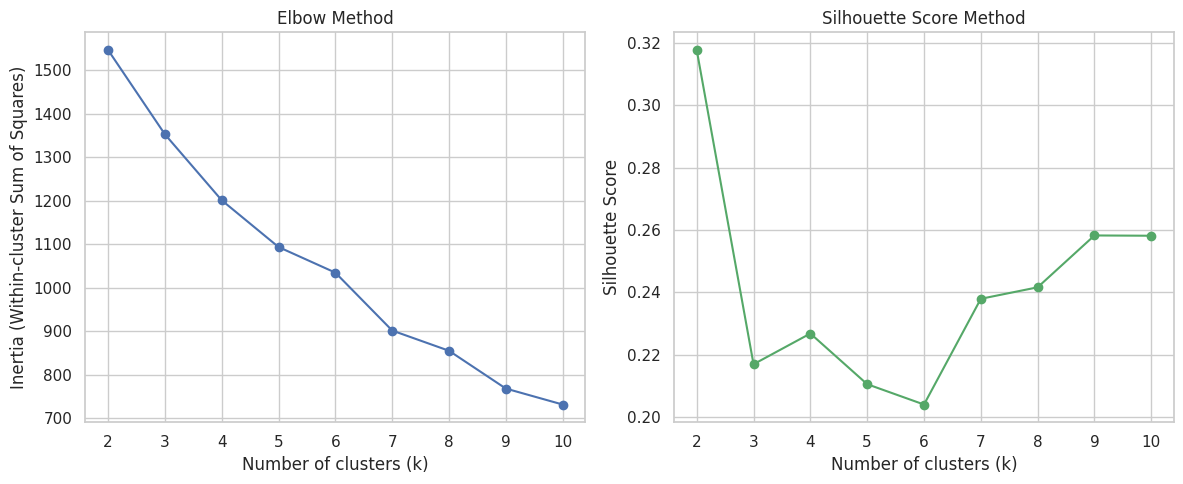

In [ ]:
# Define range of k values to try
k_range = range(2, 11)  # From 2 to 10 clusters

# Lists to hold inertia and silhouette scores
inertia_list = []
silhouette_list = []

# Loop through each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_list, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_list, 'go-')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
features_for_clustering['Cluster'] = kmeans.fit_predict(scaled_features) # Removed extra space at the beginning of this line

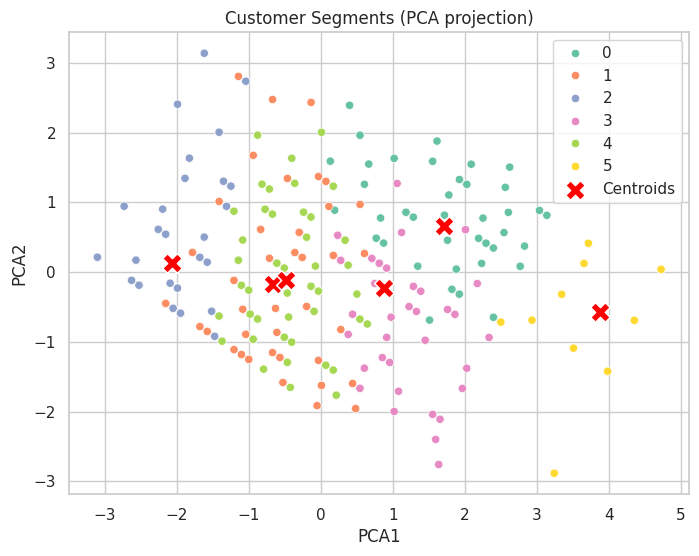

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
features_for_clustering['PCA1'] = pca_result[:, 0]
features_for_clustering['PCA2'] = pca_result[:, 1]

# Calculate centroids and project them to 2D using PCA
centroids = kmeans.cluster_centers_  # Get cluster centroids from the kmeans model
centroids_2d = pca.transform(centroids) # Transform centroids to 2D using PCA

plt.figure(figsize=(8, 6))
sns.scatterplot(data=features_for_clustering, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
sns.scatterplot(x=centroids_2d[:, 0], y=centroids_2d[:, 1], marker='X', s=200, color='red', label='Centroids') # Plot centroids
plt.title('Customer Segments (PCA projection)')
plt.show()

In [ ]:
# Ensure the cluster label exists in your DataFrame
features_for_clustering['Cluster'] = kmeans.labels_ # Use kmeans.labels_ to get cluster assignments
profile_mode = features_for_clustering.groupby('Cluster').agg(lambda x: x.mode()[0])

print("Cluster Profiles:")
print(profile_mode) # Print the calculated profile_mode

Cluster Profiles:
         Customer_Reviews_Importance  Personalized_Recommendation_Frequency   \
Cluster                                                                        
0                                  3                                       2   
1                                  0                                       2   
2                                  0                                       0   
3                                  2                                       2   
4                                  1                                       1   
5                                  4                                       4   

         Rating_Accuracy   Shopping_Satisfaction      PCA1      PCA2  
Cluster                                                               
0                       2                      3  1.183131  0.857594  
1                       1                      0 -1.043284 -0.892134  
2                       1                      0 -3.10523

In [ ]:
# STEP 1: Install kmodes
!pip install kmodes

In [ ]:
# STEP 2: Import libraries
from kmodes.kmodes import KModes


In [ ]:
# STEP 3: Select categorical survey columns
columns = ['Gender','Purchase_Categories','Personalized_Recommendation_Frequency','Search_Result_Exploration','Add_to_Cart_Browsing','Cart_Completion_Frequency','Cart_Abandonment_Factors', 'Purchase_Frequency', 'Product_Search_Method','Service_Appreciation','Improvement_Areas','Review_Left', 'Review_Reliability', 'Review_Helpfulness','Saveforlater_Frequency']
df_cat = df[columns].dropna().astype(str)  # Ensure all values are strings

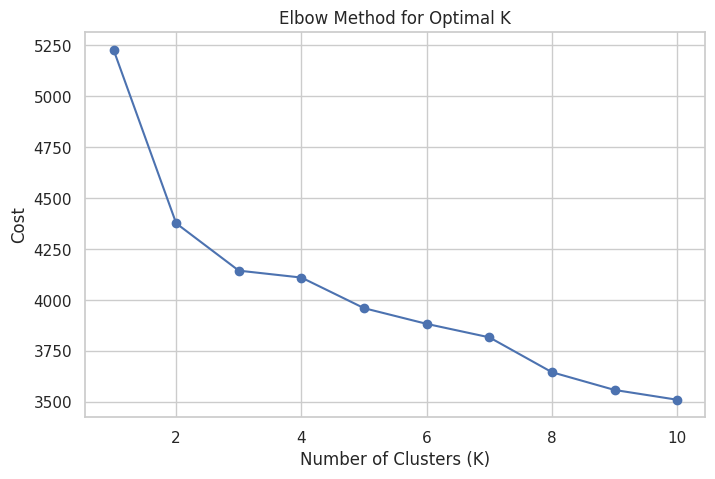

In [ ]:
#STEP4 : Find K Number of K cluster
cost = []
K_range = range(1, 11)

for k in K_range:
    km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    km.fit_predict(df_cat)  # df_cat = your categorical data
    cost.append(km.cost_)

plt.figure(figsize=(8,5))
plt.plot(K_range, cost, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [ ]:
# STEP 5: Fit K-Modes (similar to LCA for categorical data)
km = KModes(n_clusters=3, init='Cao', n_init=5, verbose=1)
clusters = km.fit_predict(df_cat)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 84, cost: 4166.0
Run 1, iteration: 2/100, moves: 50, cost: 4146.0
Run 1, iteration: 3/100, moves: 7, cost: 4146.0


In [ ]:
# STEP 6: Assign cluster labels
df_cat['Cluster'] = clusters

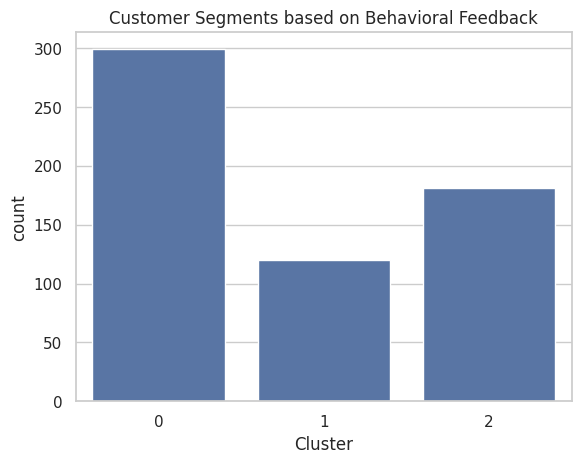

In [ ]:
# STEP 7: Visualize results
sns.countplot(data=df_cat,x='Cluster')
plt.title('Customer Segments based on Behavioral Feedback')
plt.show()

In [ ]:
# STEP 8: Segment profiling
print(df_cat.groupby('Cluster')[columns].agg(lambda x: x.mode()[0]))

         Gender       Purchase_Categories  \
Cluster                                     
0        Female  Beauty and Personal Care   
1          Male                    others   
2        Female      Clothing and Fashion   

        Personalized_Recommendation_Frequency Search_Result_Exploration  \
Cluster                                                                   
0                                   Sometimes            Multiple pages   
1                                          No            Multiple pages   
2                                          No            Multiple pages   

        Add_to_Cart_Browsing Cart_Completion_Frequency  \
Cluster                                                  
0                      Maybe                 Sometimes   
1                         No                     Often   
2                        Yes                 Sometimes   

                           Cart_Abandonment_Factors      Purchase_Frequency  \
Cluster                     